In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
# df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3649,ham,"We are hoping to get away by 7, from Langport....",NaN,NaN,NaN
3558,spam,URGENT! We are trying to contact U Todays draw...,NaN,NaN,NaN
1632,ham,Hello my little party animal! I just thought I...,NaN,NaN,NaN
2095,ham,"Probably, want to pick up more?",NaN,NaN,NaN
3704,ham,Ok. Very good. Its all about making that money.,NaN,NaN,NaN
434,ham,You available now? I'm like right around hills...,NaN,NaN,NaN
1898,ham,Wat would u like 4 ur birthday?,NaN,NaN,NaN
2387,ham,Also where's the piece,NaN,NaN,NaN
1591,ham,That's my honeymoon outfit. :),NaN,NaN,NaN
2674,ham,I am 6 ft. We will be a good combination!,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [6]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

# Remove unwanted symbols using regex

In [8]:
# Function to clean text (keep only words)
def clean_text(text):
    text = re.sub(r'[^A-Za-z]', ' ', text)  # Remove everything except letters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

# Apply cleaning function to messages
df['v2'] = df['v2'].apply(clean_text)

In [9]:
df.sample(20)

,v1,v2
683,spam,hi i m sue i am years old and work as a lapdan...
1898,ham,wat would u like ur birthday
2536,ham,you do what all you like
4363,ham,so what about you what do you remember
2222,ham,great i was getting worried about you just kno...
1199,ham,neft transaction with reference number lt gt f...
1229,ham,jus ans me lar u ll noe later
5393,ham,all done all handed in don t know if mega shop...
1180,ham,i m in chennai velachery
2675,ham,i m sick i m needy i want you pouts stomps fee...


# Remove Stopwords using nltk

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
# Download stopwords if not available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parvez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()  # Tokenize (split into words)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Join back into a single string

In [14]:
# Apply cleaning function to messages
df['v2'] = df['v2'].apply(remove_stopwords)

In [15]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
X = df['v2']
y = df['v1']

In [17]:
X.sample(10)

816       lots used ones babe model help youi bring match
2524    free entry weekly comp send word win c www txt...
1247                 horrible gal sch stuff come u got mc
1204    win year supply cds store ur choice worth ente...
2607                  yeah lol luckily starring role like
1127    height oh shit situation guy throws luv letter...
5214    natalja f inviting friend reply yes see www sm...
4877    polyphonic tone ur mob every week txt pt st to...
2683                         okay chasing dream good next
2802                    freemsg fav xmas tones reply real
Name: v2, dtype: object

# Use CountVectorizer to convert the mail into vectors

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()

In [21]:
vectorizer.fit(X)

CountVectorizer()

In [22]:
# print("Vocabulary: ", vectorizer.vocabulary_)

In [23]:
X_vector = vectorizer.transform(X)

In [24]:
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(X_vector.toarray().shape)

Encoded Document is:
(5572, 7546)


In [25]:
# Encode 'ham' as 0 and 'spam' as 1
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)  # ham = 0, spam = 1

In [26]:
y_enc.shape

(5572,)

In [27]:
# Split into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 7546), (1115, 7546), (4457,), (1115,))

In [29]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
# Print new class distribution
print(pd.Series(y_train_resampled).value_counts())

0    3859
1    3859
Name: count, dtype: int64


# Train Model

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [34]:
# Predict on test set
y_pred = nb_model.predict(X_test)
y_train_pred = nb_model.predict(X_train_resampled)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Test report and accuracy

In [37]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       966
           1       0.84      0.91      0.87       149

    accuracy                           0.97      1115
   macro avg       0.91      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
[[940  26]
 [ 13 136]]


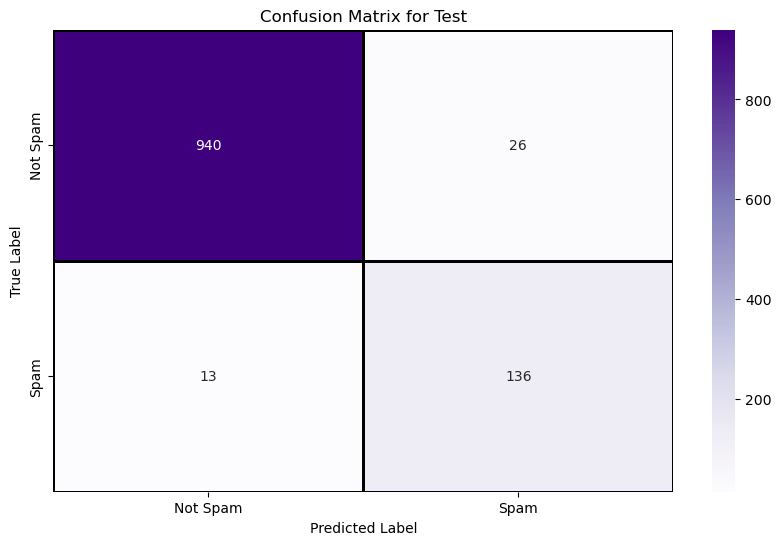

In [38]:
# Plot confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Test')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Train Report and accuracy

In [40]:
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f'Train Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_train_resampled, y_train_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_resampled, y_train_pred))

Train Accuracy: 0.8939

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3859
           1       0.98      0.81      0.88      3859

    accuracy                           0.89      7718
   macro avg       0.91      0.89      0.89      7718
weighted avg       0.91      0.89      0.89      7718


Confusion Matrix:
[[3791   68]
 [ 751 3108]]


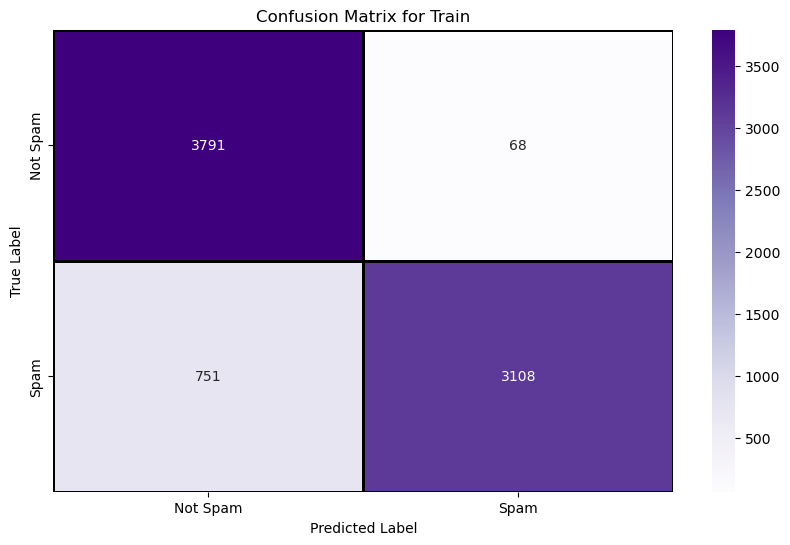

In [41]:
# Plot confusion matrix using seaborn heatmap
cm_t = confusion_matrix(y_train_resampled, y_train_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_t, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()